In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf

## Formando o dataset

In [26]:
def build(index_ticker, stock_tickers, start_date, end_date, max_missing_days=30):
    """
    Builds a dataset by downloading, cleaning, and calculating returns for a list of stock tickers.

    :param index_ticker: Ticker symbol for the index to include in the dataset
    :param start_date: Starting date for the historical data download
    :param end_date: Ending date for the historical data download
    :param max_missing_days: Maximum allowed consecutive days of missing data per stock
    :return: DataFrame with historical stock data and returns
    """
    data = download_data(index_ticker, stock_tickers, start_date, end_date)
    data = clean_data(data, max_missing_days)
    data = calculate_returns(data)

    csv_filename = f"returns_{index_ticker}_and_{start_date}-{end_date}_years.csv"
    data.to_csv(csv_filename)
    print(f"Data saved to {csv_filename}")

def download_data(index_ticker, stock_tickers, start_date, end_date):
    """
    Downloads historical adjusted close prices for an index and a list of stocks.

    :param index_ticker: Ticker symbol for the index
    :param start_date: Starting date for data download
    :param end_date: Ending date for data download
    :return: DataFrame containing the adjusted close prices for all tickers
    """
    try:
        # Combine the index and stock tickers into a single list
        all_tickers = [index_ticker] + stock_tickers
        data: pd.DataFrame = pd.DataFrame()
        data = yf.download(all_tickers, start=start_date, end=end_date)['Adj Close']
        print("Data downloaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred on data download: {e}")
        return None

def clean_data(data, max_missing_days=30):
    """
    Cleans stock data by removing stocks with prolonged missing data and interpolating gaps.

    :param data: DataFrame with stock price data
    :param max_missing_days: Maximum allowed consecutive missing days per stock
    :return: Cleaned DataFrame with interpolated data and stocks with prolonged gaps removed
    """
    try:
        data = remove_stocks_with_prolonged_missing_data(data, days_limit=max_missing_days)
        # Interpolate remaining missing values linearly using adjacent data points
        data = data.interpolate(method='linear')

        print("Data cleaned successfully.")
        return data
    except Exception as e:
        print(f"An error occurred on clean data: {e}")
        return None

def remove_stocks_with_prolonged_missing_data(data, days_limit=30):
    """
    Removes stocks with consecutive missing data days exceeding the specified limit.

    :param data: DataFrame with stock price data
    :param days_limit: Maximum allowed consecutive missing days per stock
    :return: DataFrame with only stocks that meet the missing data criteria
    """
    def check_consecutive_nans(column):
        # Create a binary series (1 for NaN, 0 for data) to identify NaN sequences
        nan_seq = column.isna().astype(int)
        # Calculate the longest consecutive sequence of NaNs
        max_nan_streak = nan_seq.groupby((nan_seq != nan_seq.shift()).cumsum()).transform('sum').max()

        return max_nan_streak >= days_limit

    # Select stocks that do not exceed the allowed limit of consecutive missing data days
    try:
        valid_columns = [col for col in data.columns if not check_consecutive_nans(data[col])]
        filtered_data = data[valid_columns]

        print(f"Removed stocks: {set(data.columns) - set(valid_columns)}")
        return filtered_data
    except Exception as e:
        print(f"An error occurred o remove stocks with consecutive missing data: {e}")
        return None

def calculate_returns(data):
    """
    Calculates daily returns for the given stock data.

    :param data: DataFrame with cleaned stock price data
    :return: DataFrame with daily returns for each stock
    """
    try:
        # Calculate the daily returns by percentage change in stock prices
        returns = data.pct_change()
        returns = returns.iloc[1:, :]

        return returns
    except Exception as e:
        print(f"An error occurred in calculate returns: {e}")
        return None


In [27]:
# Define index and stock tickers
bvsp_ticker = '^BVSP'
bvsp_stock_tickers = [
  "ALOS3.SA", "ALPA4.SA", "ABEV3.SA", "ASAI3.SA", "AURE3.SA", "AZUL4.SA", "AZZA3.SA",
  "B3SA3.SA", "BBSE3.SA", "BBDC3.SA", "BBDC4.SA", "BRAP4.SA", "BBAS3.SA", "BRKM5.SA",
  "BRAV3.SA", "BRFS3.SA", "BPAC11.SA", "CXSE3.SA", "CRFB3.SA", "CCRO3.SA", "CMIG4.SA",
  "COGN3.SA", "CPLE6.SA", "CSAN3.SA", "CPFE3.SA", "CMIN3.SA", "CVCB3.SA", "CYRE3.SA",
  "ELET3.SA", "ELET6.SA", "EMBR3.SA", "ENGI11.SA", "ENEV3.SA", "EGIE3.SA", "EQTL3.SA",
  "EZTC3.SA", "FLRY3.SA", "GGBR4.SA", "GOAU4.SA", "NTCO3.SA", "HAPV3.SA", "HYPE3.SA",
  "IGTI11.SA", "IRBR3.SA", "ITSA4.SA", "ITUB4.SA", "JBSS3.SA", "KLBN11.SA", "RENT3.SA",
  "LREN3.SA", "LWSA3.SA", "MGLU3.SA", "MRFG3.SA", "BEEF3.SA", "MRVE3.SA", "MULT3.SA",
  "PCAR3.SA", "PETR3.SA", "PETR4.SA", "RECV3.SA", "PRIO3.SA", "PETZ3.SA", "RADL3.SA",
  "RAIZ4.SA", "RDOR3.SA", "RAIL3.SA", "SBSP3.SA", "SANB11.SA", "STBP3.SA", "SMTO3.SA",
  "CSNA3.SA", "SLCE3.SA", "SUZB3.SA", "TAEE11.SA", "VIVT3.SA", "TIMS3.SA", "TOTS3.SA",
  "TRPL4.SA", "UGPA3.SA", "USIM5.SA", "VALE3.SA", "VAMO3.SA", "VBBR3.SA", "VIVA3.SA",
  "WEGE3.SA", "YDUQ3.SA"
]

sp100_ticker = '^OEX'
sp100_stock_tickers = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN',
    'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'C', 'CAT',
    'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX',
    'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FDX', 'GD', 'GE',
    'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ',
    'JPM', 'KHC', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT',
    'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE',
    'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX',
    'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH',
    'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT'
]

# Define the period for data retrieval
end_date = datetime.datetime.now()
start_date = end_date.replace(year=end_date.year - 7)

# Download the data from the choosen tickers
data_sp100 = download_data(sp100_ticker, sp100_stock_tickers, start_date, end_date)
data_bvsp = download_data(bvsp_ticker, bvsp_stock_tickers, start_date, end_date)

# Remove the stocks with more than one month of missing data and than interpolate the missing data
data_sp100 = clean_data(data_sp100)
data_bvsp = clean_data(data_bvsp)

# Calculate the returns
data_sp100_diff = calculate_returns(data_sp100)
data_bvsp_diff = calculate_returns(data_bvsp)

data_sp100.to_csv('sp100.csv')
data_bvsp.to_csv('bvsp.csv')

data_sp100_diff.to_csv('sp100_diff.csv')
data_bvsp_diff.to_csv('bvsp_diff.csv')

#

[*********************100%***********************]  99 of 99 completed


Data downloaded successfully.


[*********************100%***********************]  87 of 87 completed


Data downloaded successfully.
Removed stocks: {'DOW'}
Data cleaned successfully.
Removed stocks: {'ASAI3.SA', 'NTCO3.SA', 'VAMO3.SA', 'ALOS3.SA', 'LWSA3.SA', 'RAIZ4.SA', 'AURE3.SA', 'RDOR3.SA', 'VIVA3.SA', 'IGTI11.SA', 'BRAV3.SA', 'CXSE3.SA', 'VBBR3.SA', 'HAPV3.SA', 'PETZ3.SA', 'CMIN3.SA', 'RECV3.SA'}
Data cleaned successfully.


# Dados_BVSP

In [ ]:
def limites(df, nome_indice):
  acao_menor_media = df.drop(columns=['Date']).mean().idxmin()

  acao_menor_desvio = df.drop(columns=['Date']).std().idxmin()

  acao_maior_media = df.drop(columns=['Date']).mean().idxmax()

  acao_maior_desvio = df.drop(columns=['Date']).std().idxmax()

  print(f"\nÍndice: {nome_indice}")
  print(f"A ação com o menor valor médio é '{acao_menor_media}'")
  print(f"A ação com o maior valor médio é '{acao_maior_media}'.")
  print(f"A ação com o menor desvio padrão é '{acao_menor_desvio}'")
  print(f"A ação com o maior desvio padrão é '{acao_maior_desvio}'")

  return (acao_menor_media, acao_menor_desvio, acao_maior_media, acao_maior_desvio)

df_sp100 = pd.read_csv('sp100.csv')
df_sp100['Date'] = pd.to_datetime(df_sp100['Date'])
df_sp100_index = df_sp100[['Date', sp100_ticker]].copy()
df_sp100 = df_sp100.drop(columns=sp100_ticker)

df_sp100_diff = pd.read_csv('sp100_diff.csv')
df_sp100_diff['Date'] = pd.to_datetime(df_sp100_diff['Date'])
df_sp100_diff_index = df_sp100_diff[['Date', sp100_ticker]].copy()
df_sp100_diff = df_sp100_diff.drop(columns=sp100_ticker)

df_bvsp = pd.read_csv('bvsp.csv')
df_bvsp['Date'] = pd.to_datetime(df_bvsp['Date'])
df_bvsp_index = df_bvsp[['Date', bvsp_ticker]].copy()
df_bvsp = df_bvsp.drop(columns=bvsp_ticker)

df_bvsp_diff = pd.read_csv('bvsp_diff.csv')
df_bvsp_diff['Date'] = pd.to_datetime(df_bvsp_diff['Date'])
df_bvsp_diff_index = df_bvsp_diff[['Date', bvsp_ticker]].copy()
df_bvsp_diff = df_bvsp_diff.drop(columns=bvsp_ticker)

acao_menor_media_sp100, acao_menor_desvio_sp100, acao_maior_media_sp100, acao_maior_desvio_sp100 = limites(df_sp100, 'sp100')
acao_menor_media_bvsp, acao_menor_desvio_bvsp, acao_maior_media_bvsp, acao_maior_desvio_bvsp = limites(df_bvsp, 'bvsp')



Índice: sp100
A ação com o menor valor médio é 'F'
A ação com o maior valor médio é 'BKNG'.
A ação com o menor desvio padrão é 'T'
A ação com o maior desvio padrão é 'BKNG'

Índice: bvsp
A ação com o menor valor médio é 'CMIG4.SA'
A ação com o maior valor médio é 'IRBR3.SA'.
A ação com o menor desvio padrão é 'ITSA4.SA'
A ação com o maior desvio padrão é 'IRBR3.SA'


## Valor das Top 5 ações SP100

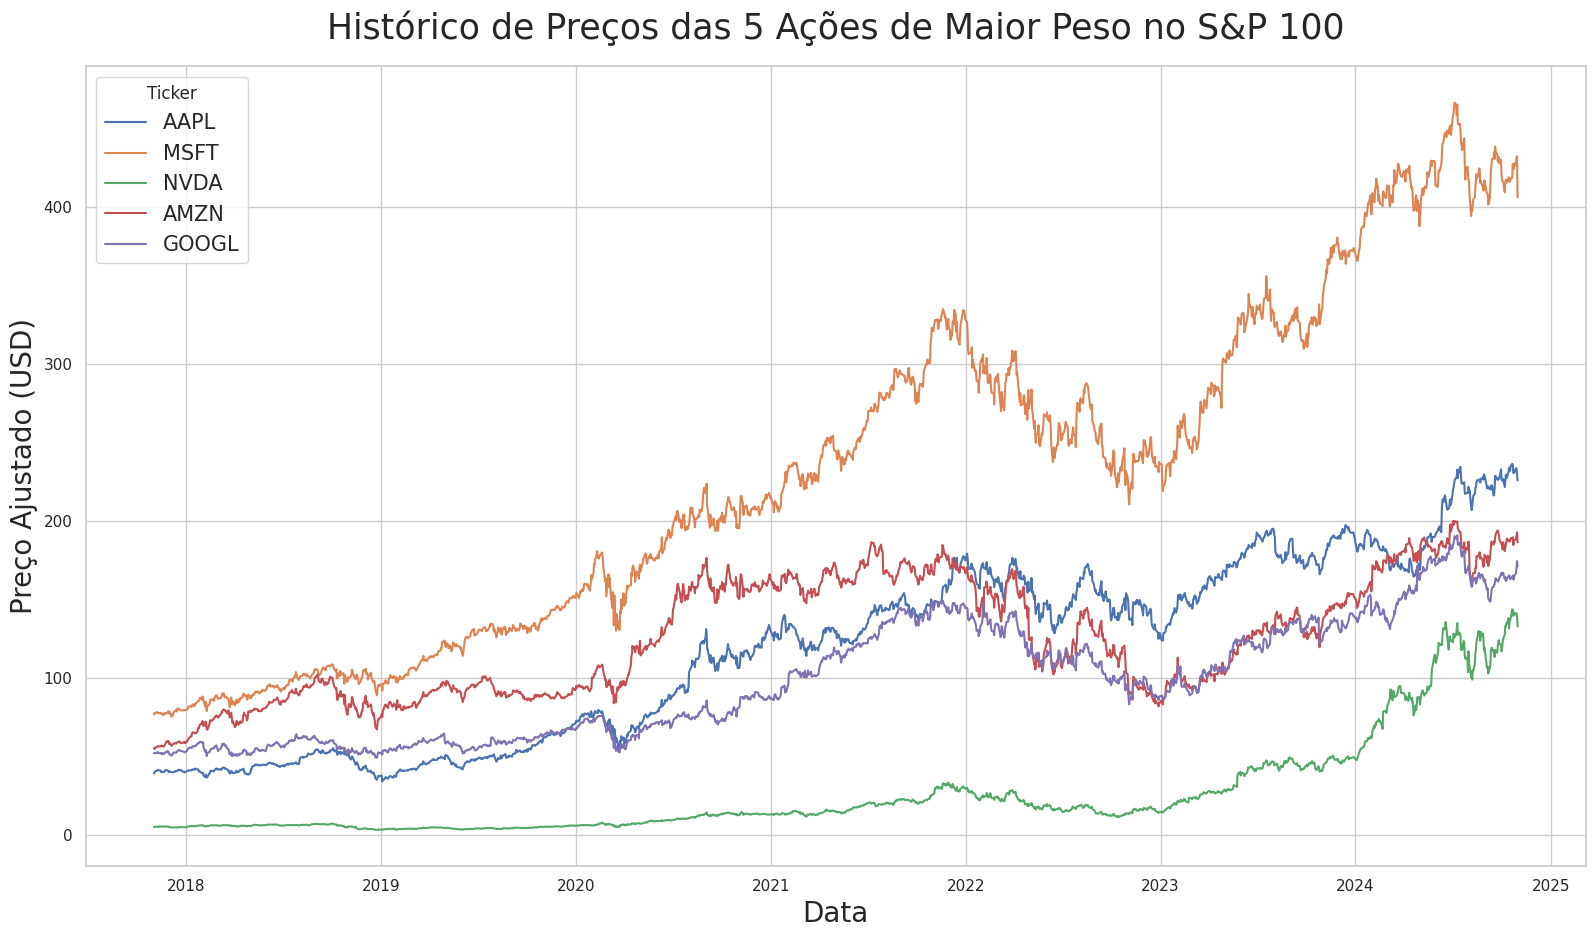

In [ ]:
# Define as cinco ações de maior peso
top5_tickers = ["AAPL", "MSFT", "NVDA", "AMZN", "GOOGL"]

# Filtra os dados de preço ajustado para as cinco ações
top5_data = df_sp100.set_index('Date')[top5_tickers]  # Assumindo que a coluna 'date' está presente

# Configura o gráfico com os parâmetros especificados
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

# Plota o histórico de preços das cinco ações
for ticker in top5_tickers:
    eixo.plot(top5_data.index, top5_data[ticker], label=ticker)

# Configurações do gráfico
eixo.set_title("Histórico de Preços das 5 Ações de Maior Peso no S&P 100", fontsize=25, pad=20)
eixo.legend(title="Ticker", loc='upper left', fontsize=15)
eixo.set_ylabel('Preço Ajustado (USD)', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)

plt.show()

## Valor das top5 ações IBOVESP

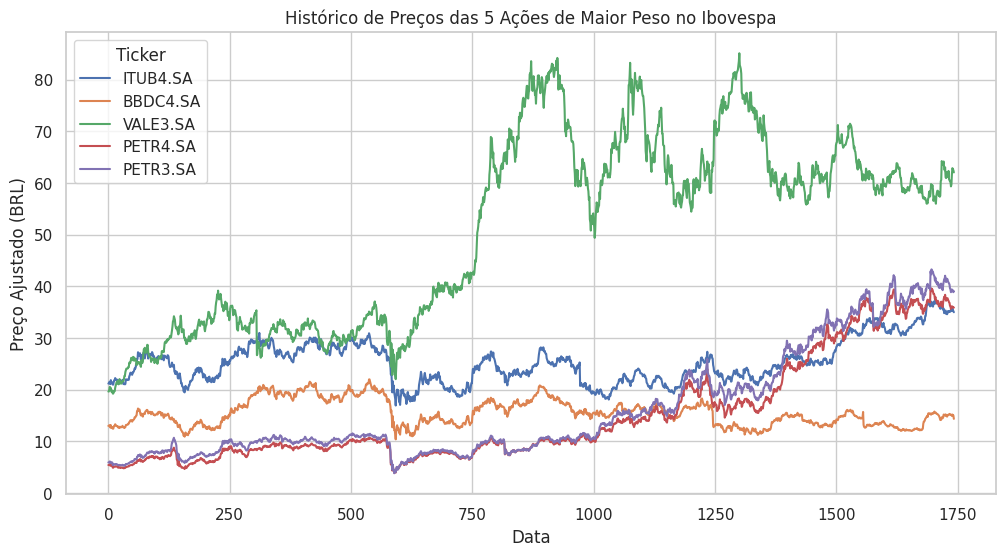

In [ ]:
top5_ibov_tickers = ["ITUB4.SA", "BBDC4.SA", "VALE3.SA", "PETR4.SA", "PETR3.SA"]


top5_data = df_bvsp.set_index('Date')[top5_ibov_tickers]  # Assumindo que a coluna 'date' está presente

top5_ibov_data = df_bvsp[top5_ibov_tickers]

# Plota o histórico de preços das 5 ações
plt.figure(figsize=(12, 6))
for ticker in top5_ibov_tickers:
    plt.plot(top5_ibov_data.index, top5_ibov_data[ticker], label=ticker)

# Configurações do gráfico
plt.title("Histórico de Preços das 5 Ações de Maior Peso no Ibovespa")
plt.xlabel("Data")
plt.ylabel("Preço Ajustado (BRL)")
plt.legend(title="Ticker")
plt.grid(True)
plt.show()

## Media na variação diária das top5 ações IBOVESP

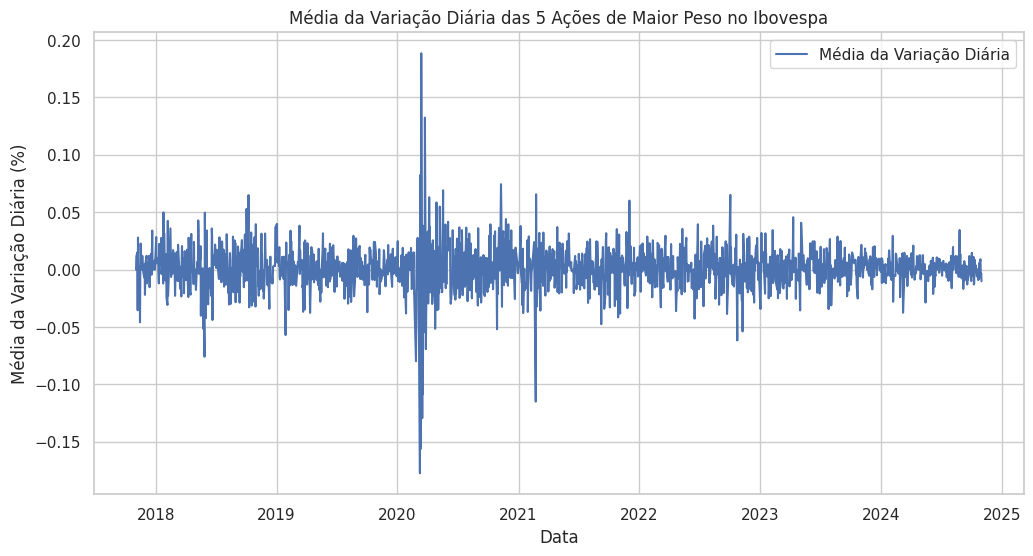

In [ ]:
top5_ibov_tickers = ["ITUB4.SA", "BBDC4.SA", "VALE3.SA", "PETR4.SA", "PETR3.SA"]

top5_returns = df_bvsp_diff.set_index('Date')[top5_ibov_tickers]

# Calcular a média da variação diária
mean_daily_variation = top5_returns.mean(axis=1)

# Plotar a média da variação diária
plt.figure(figsize=(12, 6))
plt.plot(mean_daily_variation.index, mean_daily_variation, label="Média da Variação Diária", color='g')

# Configurações do gráfico
plt.title("Média da Variação Diária das 5 Ações de Maior Peso no Ibovespa")
plt.xlabel("Data")
plt.ylabel("Média da Variação Diária (%)")
plt.legend()
plt.grid(True)
plt.show()

## Média da variação diária das Top5 ações SP100

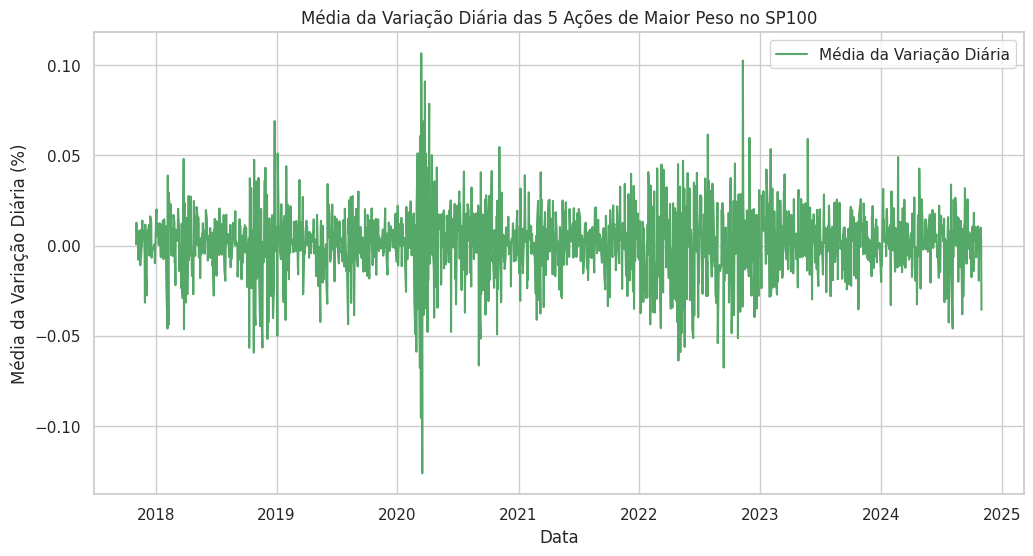

In [ ]:
top5_sp100_tickers = ["AAPL", "MSFT", "NVDA", "AMZN", "GOOGL"]

top5_returns = df_sp100_diff.set_index('Date')[top5_sp100_tickers]

# Calcular a média da variação diária
mean_daily_variation = top5_returns.mean(axis=1)

# Plotar a média da variação diária
plt.figure(figsize=(12, 6))
plt.plot(mean_daily_variation.index, mean_daily_variation, label="Média da Variação Diária")

# Configurações do gráfico
plt.title("Média da Variação Diária das 5 Ações de Maior Peso no SP100")
plt.xlabel("Data")
plt.ylabel("Média da Variação Diária (%)")
plt.legend()
plt.grid(True)
plt.show()

## Ação com o maior desvio padrão BVSP

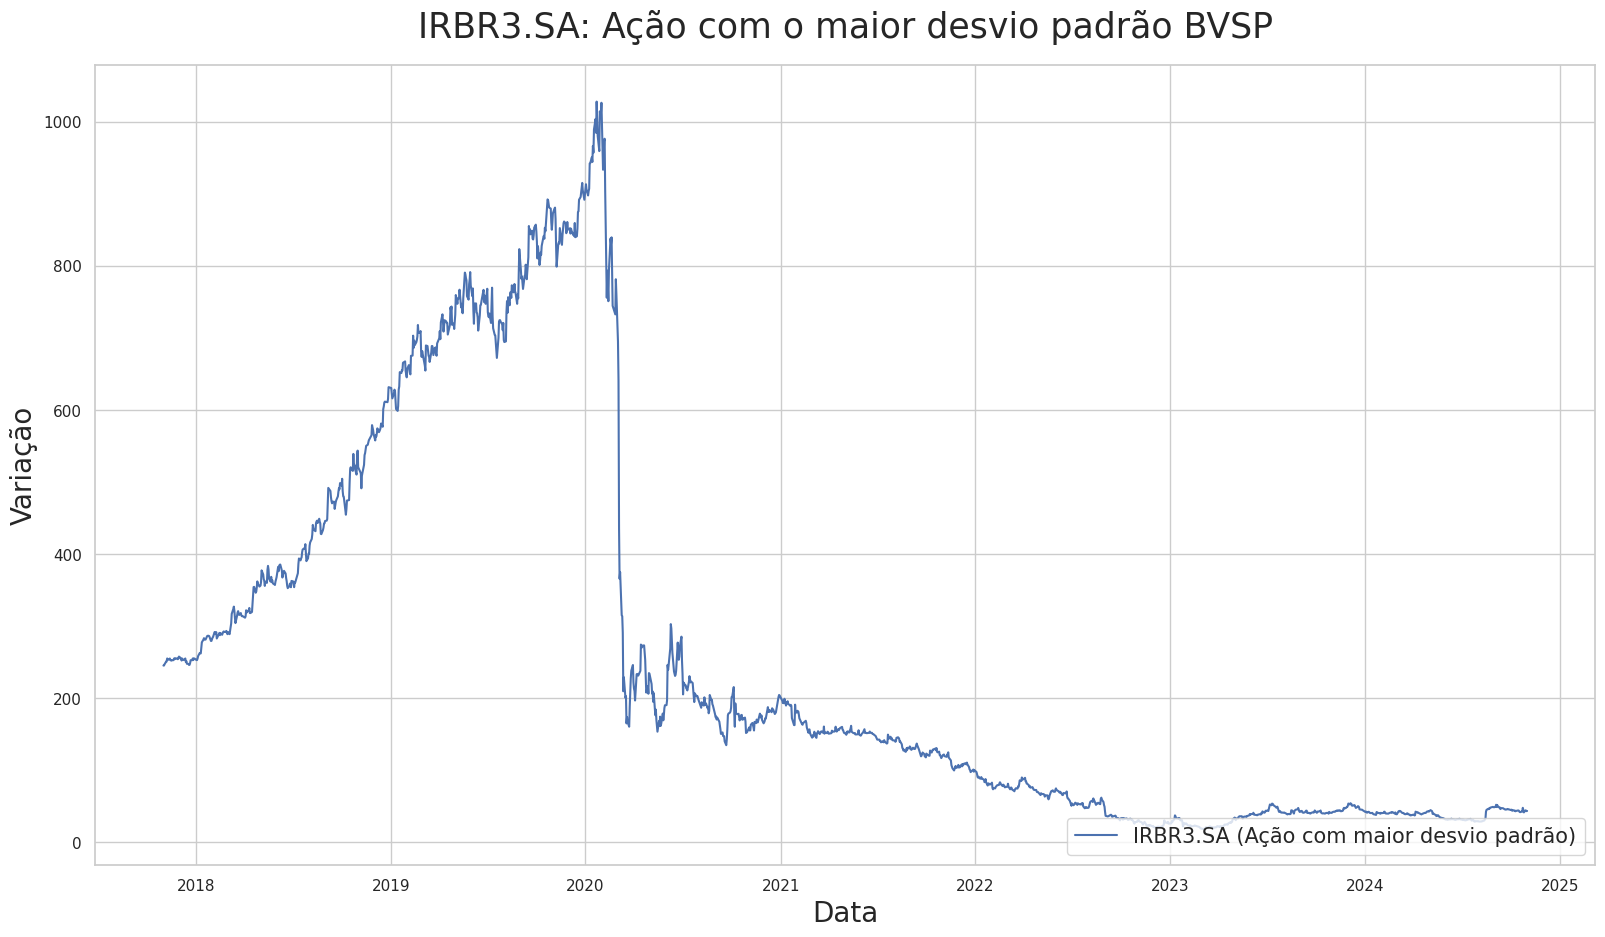

In [31]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df_bvsp['Date'], df_bvsp[acao_maior_desvio_bvsp])
eixo.set_title(f'{acao_maior_desvio_bvsp}: Ação com o maior desvio padrão BVSP', fontsize=25, pad=20)
eixo.legend([f'{acao_maior_desvio_bvsp} (Ação com maior desvio padrão)'], loc='lower right', fontsize=15)
eixo.set_ylabel('Variação', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)

## Ação com o menor desvio padrão SP100

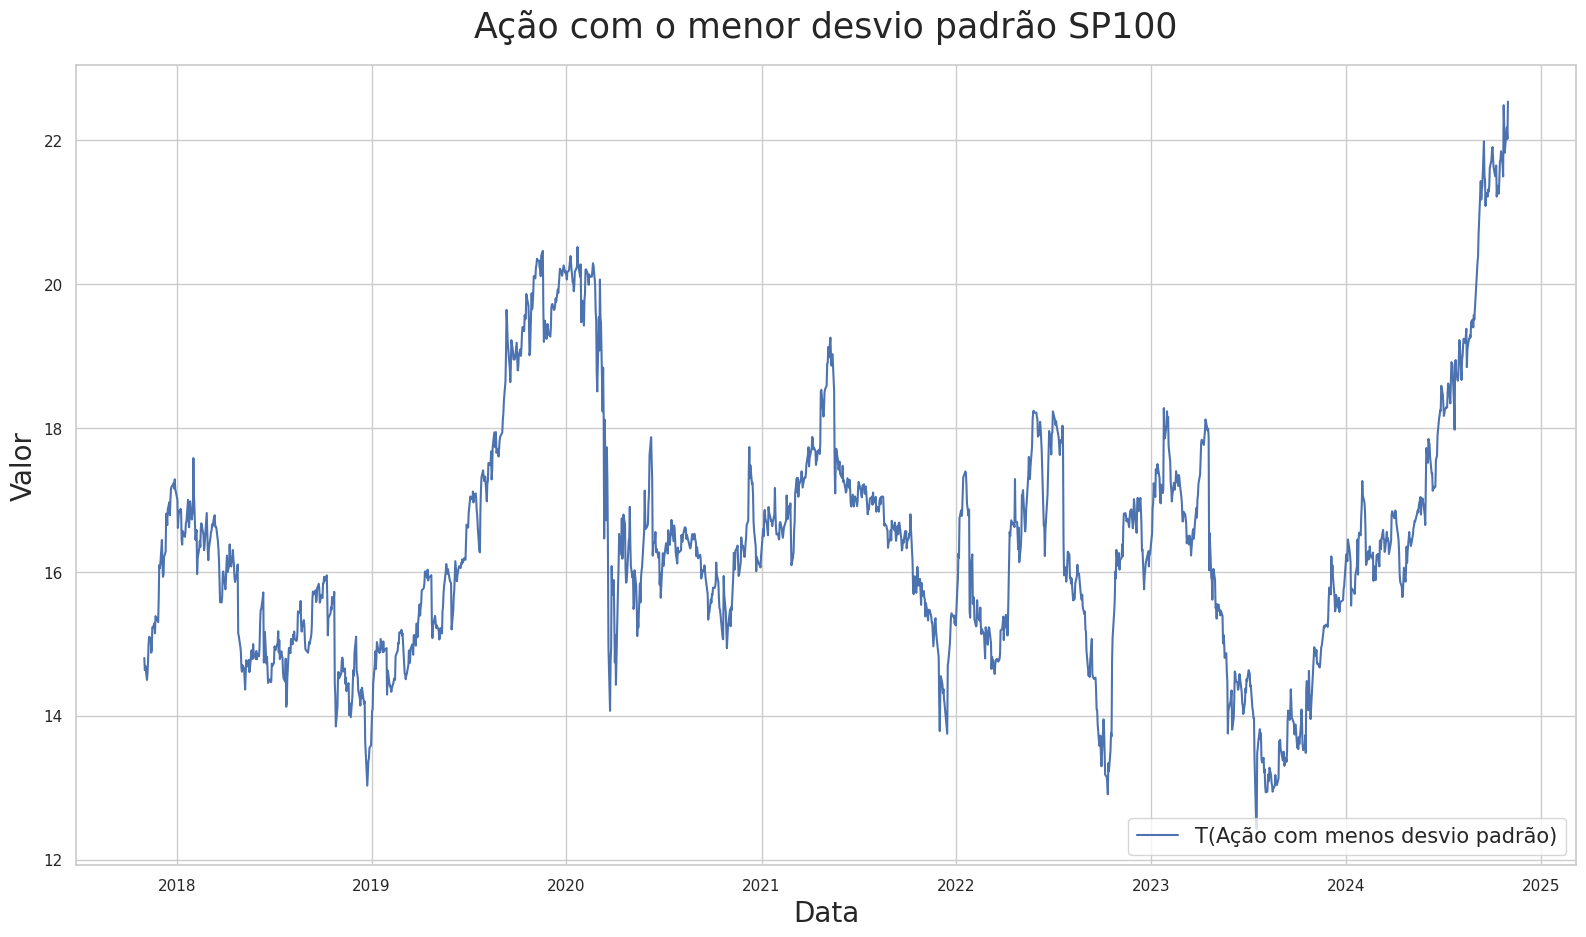

In [32]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df_sp100['Date'], df_sp100[acao_menor_desvio_sp100])
eixo.set_title(f'Ação com o menor desvio padrão SP100', fontsize=25, pad=20)
eixo.legend([f'{acao_menor_desvio_sp100}(Ação com menos desvio padrão)'], loc='lower right', fontsize=15)
eixo.set_ylabel('Valor', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)

## Ação com o maior valor médio SP100

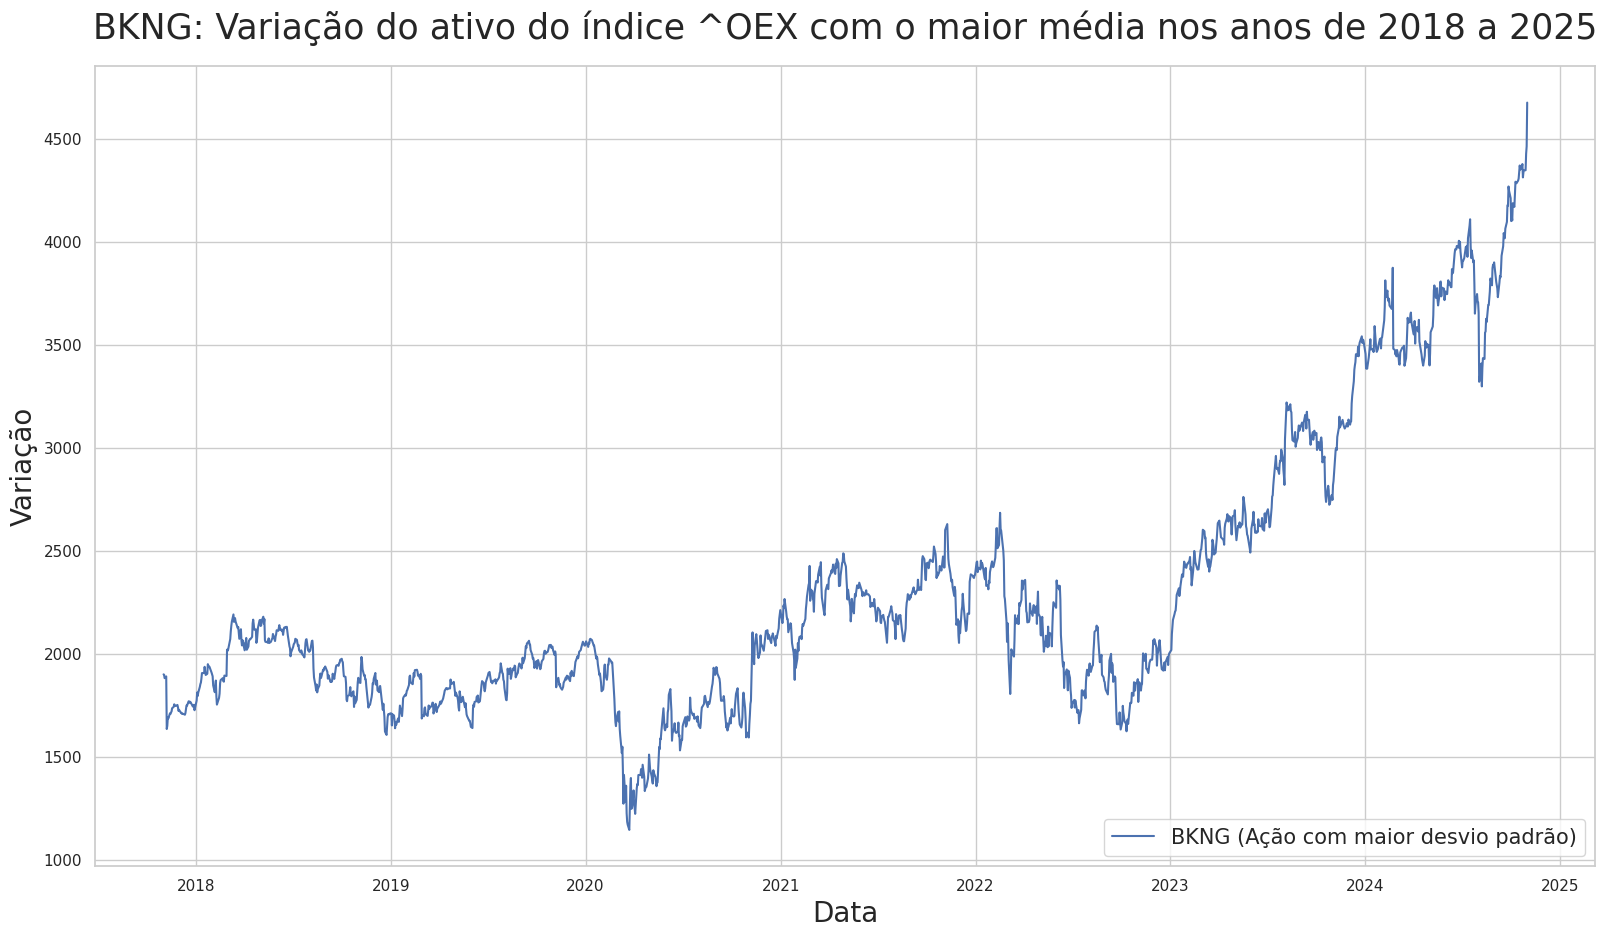

In [33]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df_sp100['Date'], df_sp100[acao_maior_media_sp100])
eixo.set_title(f'{acao_maior_media_sp100}: Variação do ativo do índice {sp100_ticker} com o maior média nos anos de 2018 a 2025', fontsize=25, pad=20)
eixo.legend([f'{acao_maior_media_sp100} (Ação com maior desvio padrão)'], loc='lower right', fontsize=15)
eixo.set_ylabel('Variação', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)                        #Anomalia acho que teria que descartar !!!!

## Ação com o maior valor médio BVSP

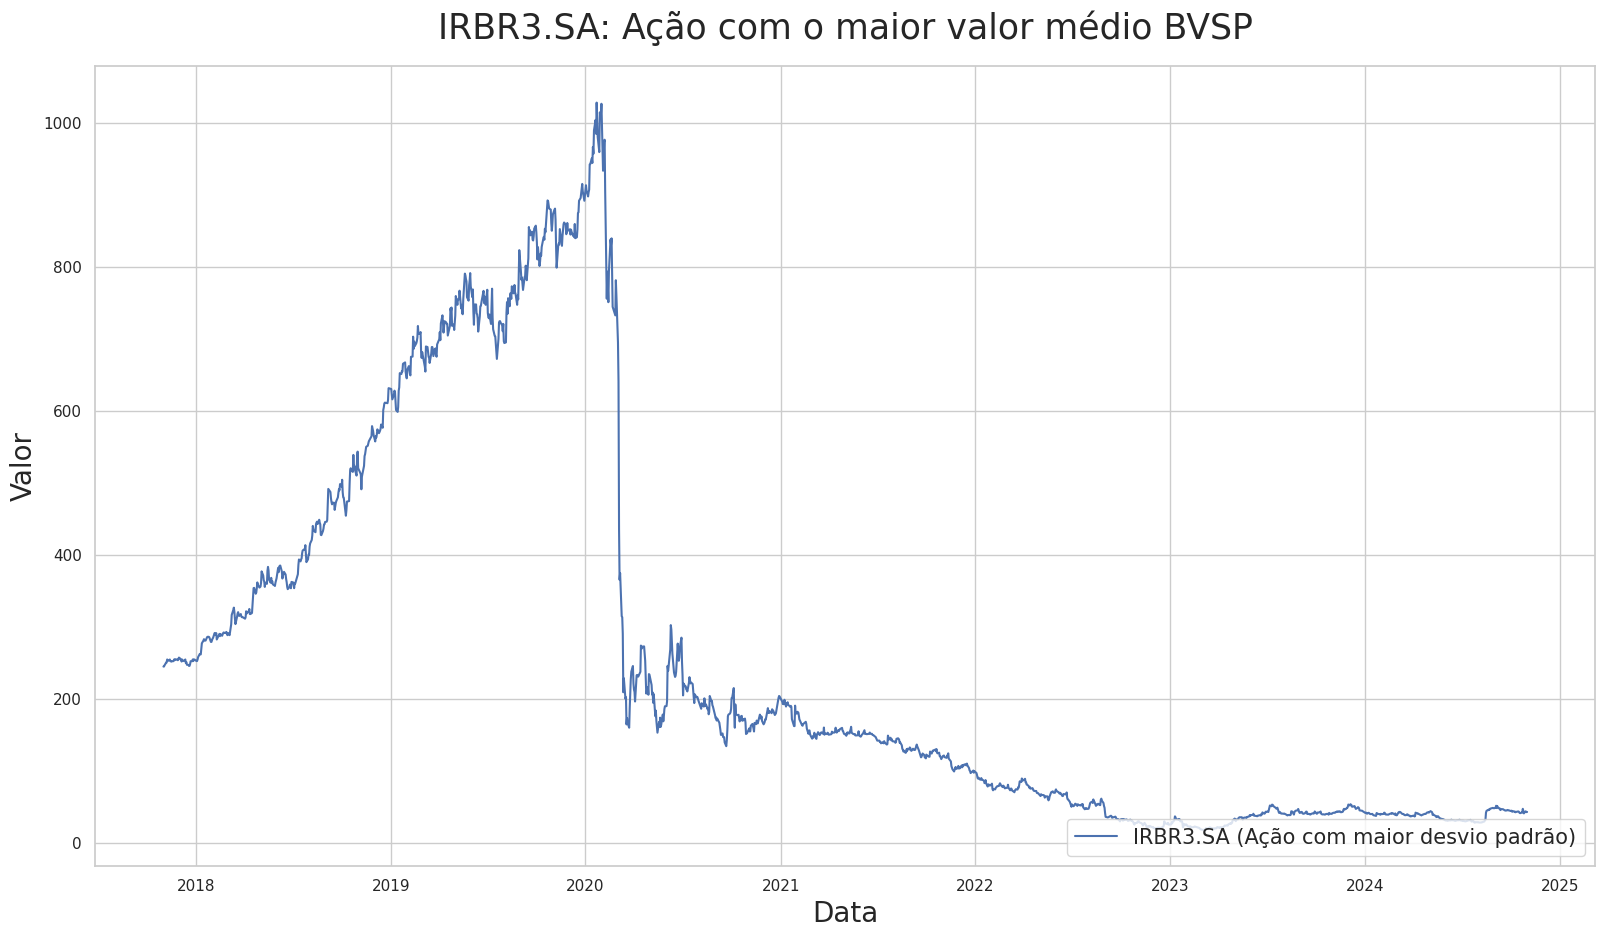

In [34]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df_bvsp['Date'], df_bvsp[acao_maior_media_bvsp])
eixo.set_title(f'{acao_maior_media_bvsp}: Ação com o maior valor médio BVSP', fontsize=25, pad=20)
eixo.legend([f'{acao_maior_media_bvsp} (Ação com maior desvio padrão)'], loc='lower right', fontsize=15)
eixo.set_ylabel('Valor', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)                        #Anomalia acho que teria que descartar !!!!

## Ação com o menor valor médio  SP100






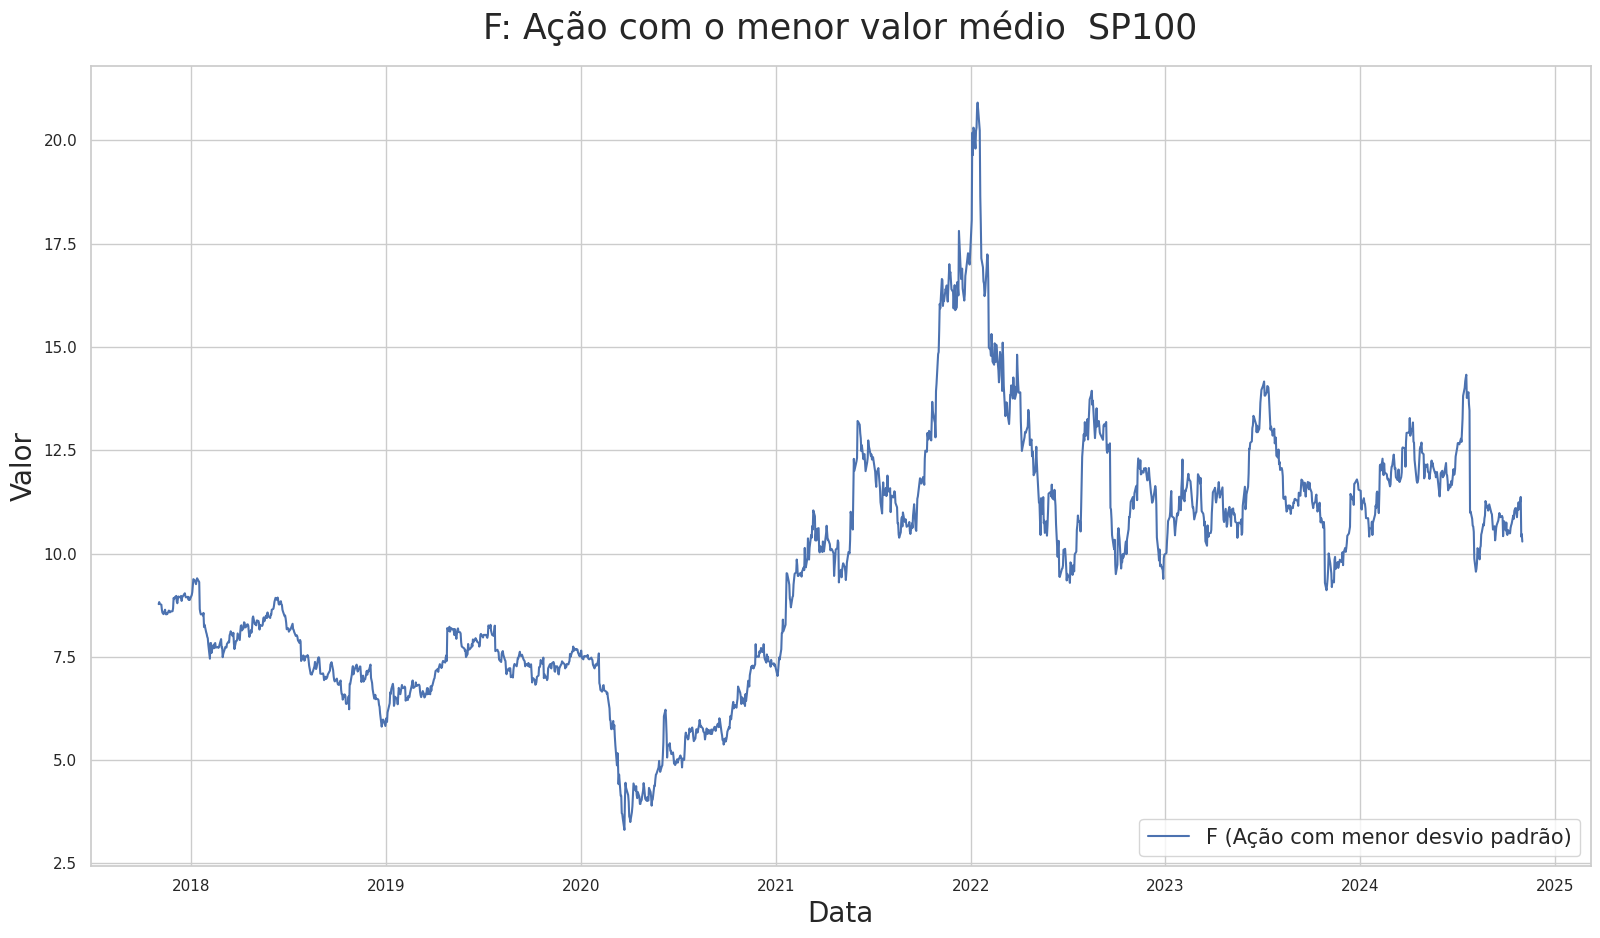

In [35]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df_sp100['Date'], df_sp100[acao_menor_media_sp100])
eixo.set_title(f'{acao_menor_media_sp100}: Ação com o menor valor médio  SP100', fontsize=25, pad=20)
eixo.legend([f'{acao_menor_media_sp100} (Ação com menor desvio padrão)'], loc='lower right', fontsize=15)
eixo.set_ylabel('Valor', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)

## Ação com o menor valor médio  BVSP

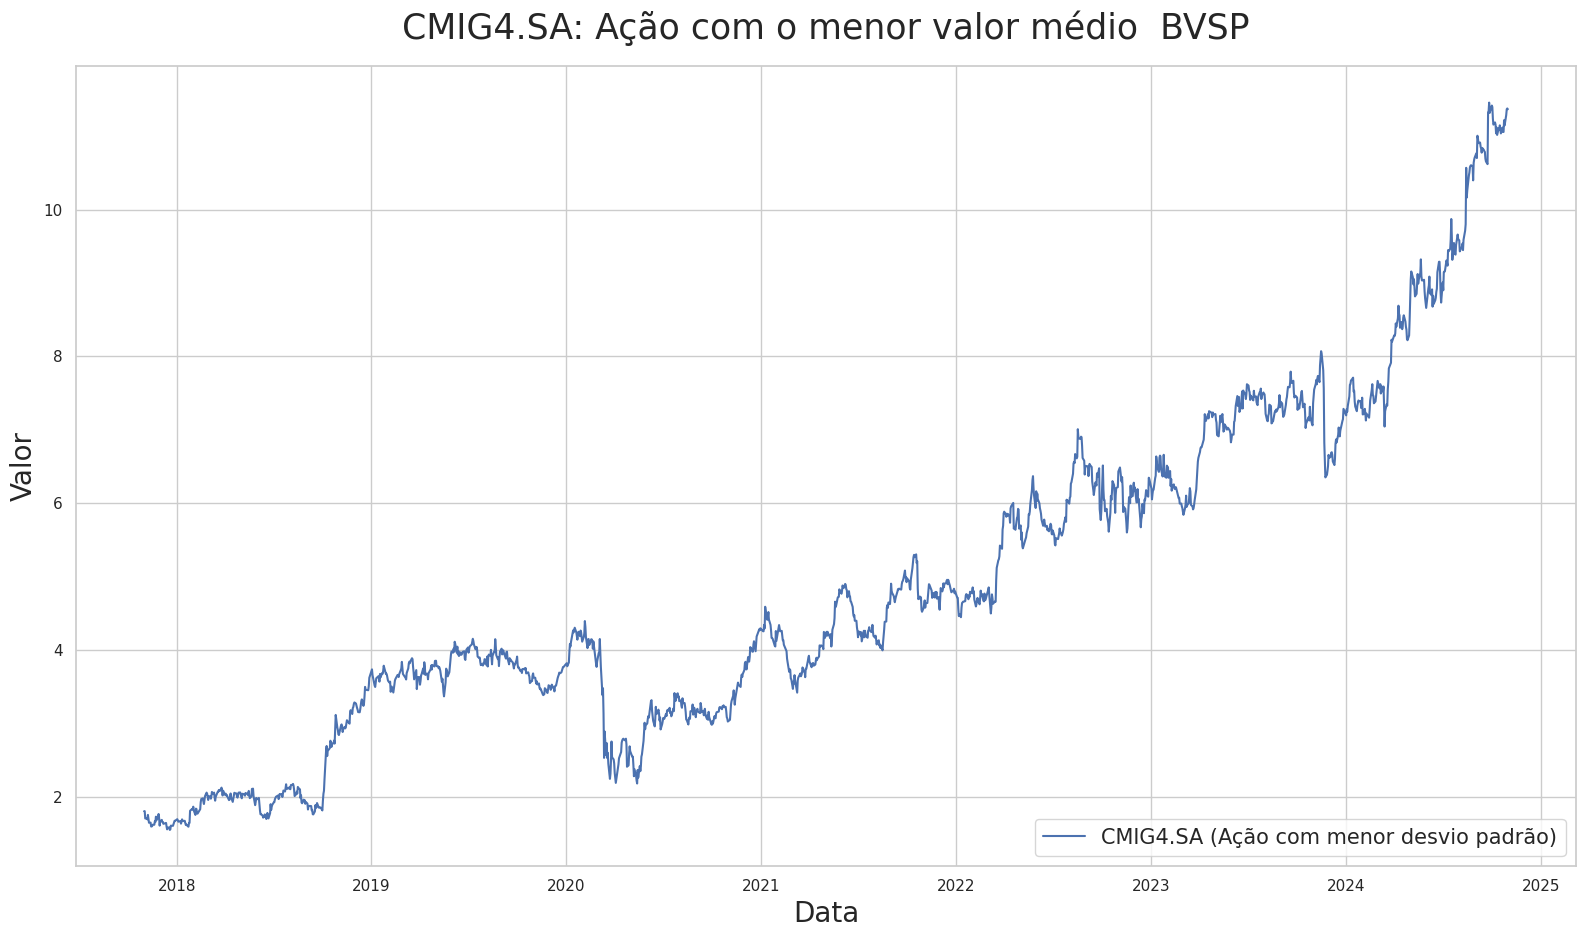

In [36]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(df_bvsp['Date'], df_bvsp[acao_menor_media_bvsp])
eixo.set_title(f'{acao_menor_media_bvsp}: Ação com o menor valor médio  BVSP', fontsize=25, pad=20)
eixo.legend([f'{acao_menor_media_bvsp} (Ação com menor desvio padrão)'], loc='lower right', fontsize=15)
eixo.set_ylabel('Valor', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.grid(True)

# Desvio Padrão de todas as ações do S&P100

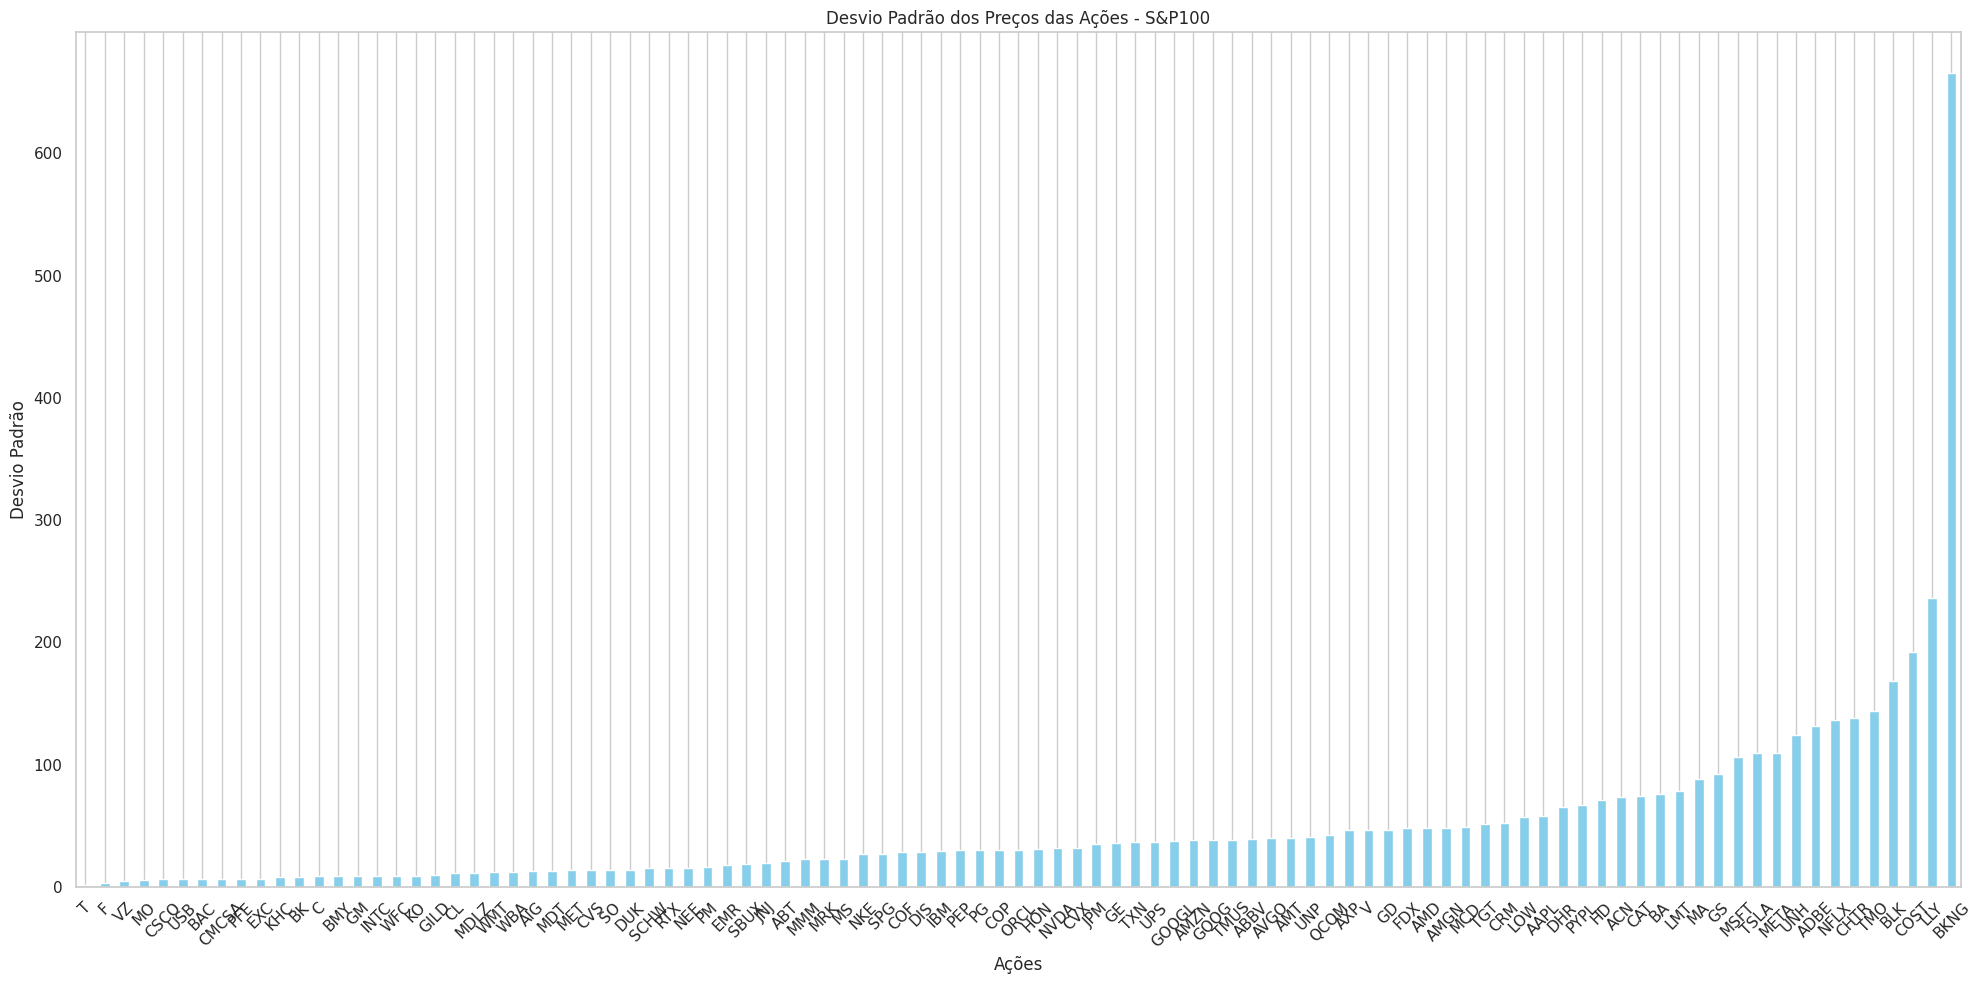

In [37]:
if 'Date' in df_sp100.columns:
    std_dev = df_sp100.drop(columns=['Date']).std()
else:
    std_dev = df_sp100.std()

plt.figure(figsize=(20, 10))
std_dev.sort_values().plot(kind='bar', color='skyblue')
plt.title('Desvio Padrão dos Preços das Ações - S&P100')
plt.xlabel('Ações')
plt.ylabel('Desvio Padrão')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Desvio Padrão de todas as ações da BOVESPA

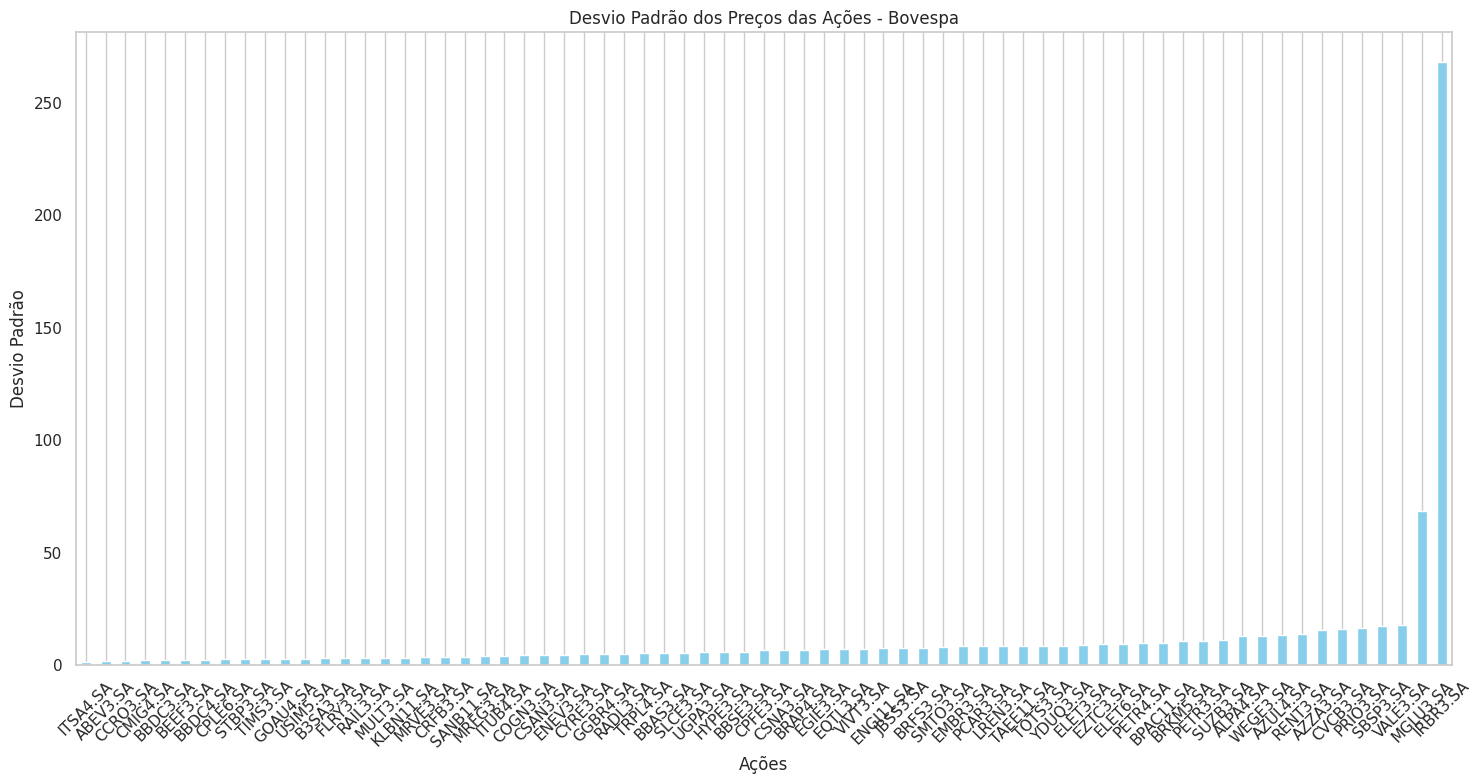

In [38]:
std_dev = df_bvsp.drop(columns=['Date']).std()


plt.figure(figsize=(15, 8))
std_dev.sort_values().plot(kind='bar', color='skyblue')
plt.title('Desvio Padrão dos Preços das Ações - Bovespa')
plt.xlabel('Ações')
plt.ylabel('Desvio Padrão')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Infos sobre os datasets

In [39]:
df_sp100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 98 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    1761 non-null   datetime64[ns, UTC]
 1   AAPL    1761 non-null   float64            
 2   ABBV    1761 non-null   float64            
 3   ABT     1761 non-null   float64            
 4   ACN     1761 non-null   float64            
 5   ADBE    1761 non-null   float64            
 6   AIG     1761 non-null   float64            
 7   AMD     1761 non-null   float64            
 8   AMGN    1761 non-null   float64            
 9   AMT     1761 non-null   float64            
 10  AMZN    1761 non-null   float64            
 11  AVGO    1761 non-null   float64            
 12  AXP     1761 non-null   float64            
 13  BA      1761 non-null   float64            
 14  BAC     1761 non-null   float64            
 15  BK      1761 non-null   float64            
 16  BKNG  

In [40]:
df_sp100.describe()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,...,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,117.913618,106.085633,91.698712,241.555888,403.740931,49.463691,77.897348,211.735726,193.130668,125.657491,...,137.168528,368.296126,182.604916,133.307337,40.883055,196.462260,40.331275,36.754297,42.130125,43.037352
std,57.880774,39.000336,21.433933,73.677864,131.519122,13.100916,47.879480,47.982526,39.780913,38.013264,...,36.618707,124.366744,40.887481,36.741111,6.272224,46.665148,4.954190,12.045925,9.010515,11.929014
min,33.989895,50.093044,47.807560,122.653931,167.539993,16.710823,9.530000,136.482330,113.147522,54.710999,...,74.312584,182.535019,99.293900,73.969803,23.566635,102.553123,28.753960,8.250000,19.272533,24.752340
25%,52.659180,71.302841,74.707108,168.737823,280.339996,43.530815,30.950001,169.067825,172.661621,91.149498,...,98.650513,240.083618,148.219238,94.951393,38.063255,165.134949,35.952427,29.886862,39.378963,34.416451
50%,129.101395,95.518379,99.582008,253.725296,397.899994,48.638508,80.470001,210.123734,197.716705,123.430000,...,149.491806,377.725037,190.487045,141.425858,41.243248,201.919159,41.656506,38.756031,42.553196,43.658421
75%,166.552917,139.287827,108.795341,304.370819,507.220001,57.048805,108.220001,231.580933,222.044479,161.190994,...,167.308487,486.059235,213.798340,165.178970,44.698086,226.335098,44.546944,44.836388,46.798271,48.114975
max,236.479996,203.869995,133.728119,397.036957,688.369995,79.667015,211.380005,337.380005,276.519745,200.000000,...,212.938065,605.400024,260.918152,208.676010,55.541767,291.559998,48.907211,65.078697,65.610001,83.269997


In [41]:
df_bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 70 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1743 non-null   datetime64[ns, UTC]
 1   ABEV3.SA   1743 non-null   float64            
 2   ALPA4.SA   1743 non-null   float64            
 3   AZUL4.SA   1743 non-null   float64            
 4   AZZA3.SA   1743 non-null   float64            
 5   B3SA3.SA   1743 non-null   float64            
 6   BBAS3.SA   1743 non-null   float64            
 7   BBDC3.SA   1743 non-null   float64            
 8   BBDC4.SA   1743 non-null   float64            
 9   BBSE3.SA   1743 non-null   float64            
 10  BEEF3.SA   1743 non-null   float64            
 11  BPAC11.SA  1743 non-null   float64            
 12  BRAP4.SA   1743 non-null   float64            
 13  BRFS3.SA   1743 non-null   float64            
 14  BRKM5.SA   1743 non-null   float64            
 15  CCRO

In [42]:
df_bvsp.describe()

,ABEV3.SA,ALPA4.SA,AZUL4.SA,AZZA3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,...,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,13.799224,21.408844,26.353821,59.245879,11.365557,16.362956,13.990738,15.508144,22.193507,8.345880,...,24.260128,11.291430,23.086999,17.980551,13.053746,8.572828,50.821062,36.813200,26.222033,22.689089
std,1.769678,13.088882,13.573385,15.735900,3.036081,5.296999,2.367144,2.513912,5.942286,2.431470,...,8.600809,2.702746,8.607162,5.255038,5.696016,2.976608,18.067161,7.415785,13.200325,8.694625
min,9.292286,6.830000,4.040000,30.367125,4.979096,8.002464,9.311373,10.399397,13.755080,3.666957,...,10.021360,7.755587,7.408474,8.229716,4.350298,3.041217,19.263506,23.318102,6.902559,6.356059
25%,12.763044,9.875155,14.395000,45.921095,9.930857,12.179578,12.203671,13.374750,17.333924,6.539797,...,16.933679,9.396094,15.144437,14.186656,8.527045,6.650620,32.391661,32.249516,10.559394,16.936011
50%,13.656193,16.700001,24.360001,57.461258,11.642543,14.962902,13.489845,15.200000,20.532133,8.118181,...,27.837423,10.440693,26.536009,19.966179,12.022378,7.610000,57.900795,36.106937,30.854544,22.340267
75%,14.817978,29.997285,37.000000,71.917507,13.300814,18.457487,15.312106,17.230360,27.323307,10.033627,...,32.344601,12.075625,29.287048,21.417982,14.869993,9.481798,64.048180,41.046595,36.402672,28.287974
max,19.354807,60.498562,62.410000,99.447609,18.666697,29.059889,20.970619,22.005962,37.419998,15.145241,...,36.394352,18.790001,38.974434,27.750000,30.328665,19.149401,85.115005,56.090000,57.189999,52.662155


# teste

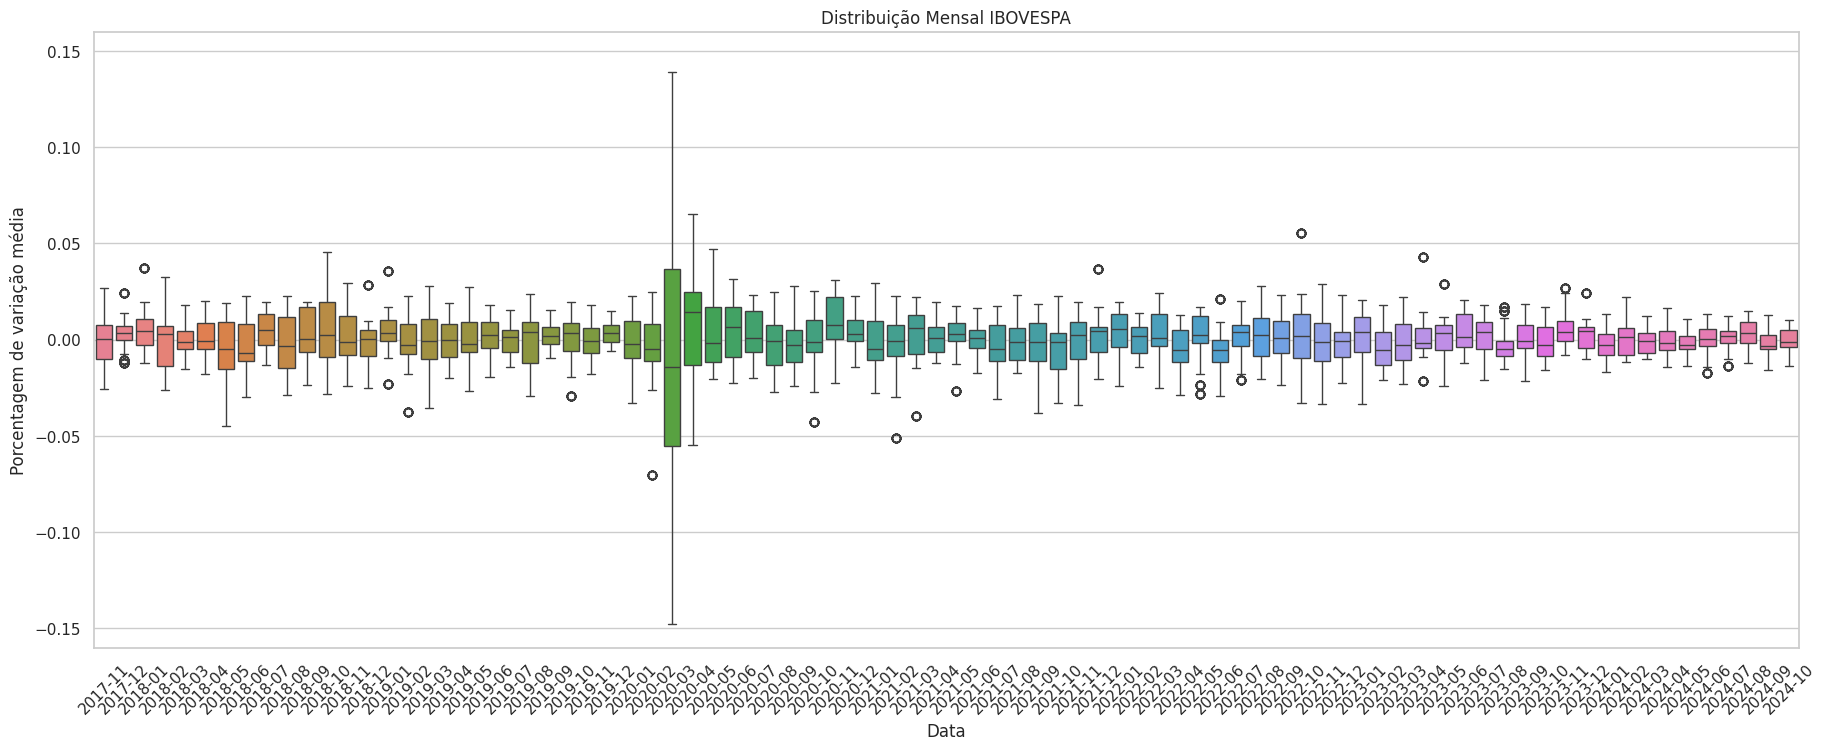

In [43]:
# Copiando o dataframe original
df = df_bvsp_diff_index.copy()

# Convertendo 'Date' para datetime e removendo timezone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

# Criando a coluna 'YearMonth' como Period
df['YearMonth'] = df['Date'].dt.to_period('M')
df = df.drop(columns='Date')

# Configurando o estilo do Seaborn
sns.set_theme(style="whitegrid", palette="flare")

# Plotando o boxplot com o Seaborn
plt.figure(figsize=(22, 8))
sns.boxplot(data=df.set_index('YearMonth').T)

# Personalizando o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.title("Distribuição Mensal IBOVESPA")
plt.xlabel("Data")
plt.ylabel("Porcentagem de variação média")
plt.ylim(-0.16, 0.16)
plt.show()


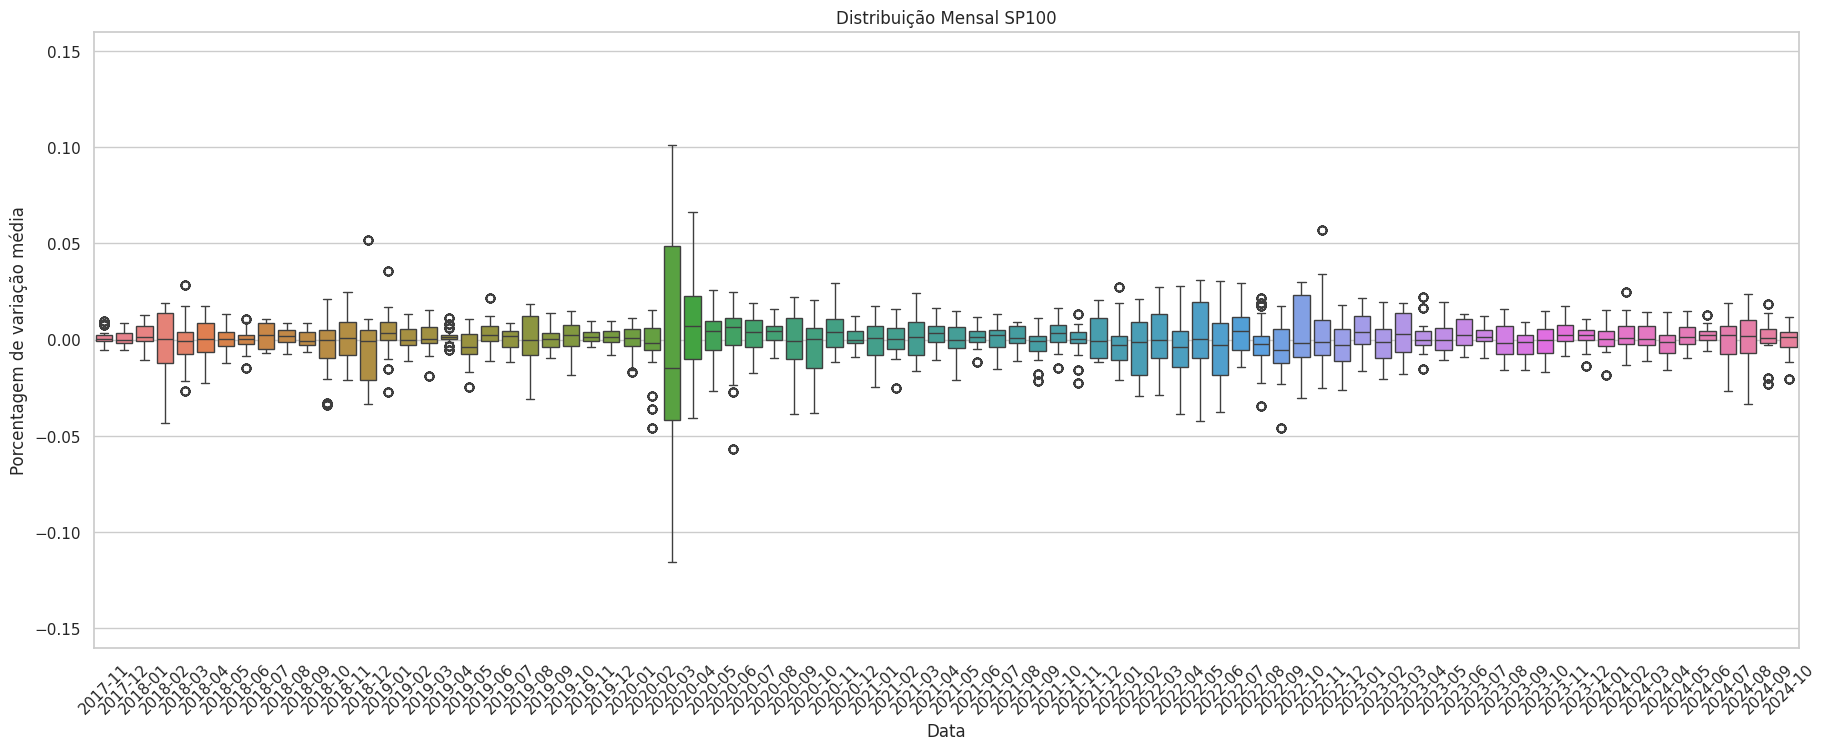

In [44]:
# Copiando o dataframe original
df = df_sp100_diff_index.copy()

# Convertendo 'Date' para datetime e removendo timezone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

# Criando a coluna 'YearMonth' como Period
df['YearMonth'] = df['Date'].dt.to_period('M')
df = df.drop(columns='Date')

# Configurando o estilo do Seaborn
sns.set_theme(style="whitegrid")

# Plotando o boxplot com o Seaborn
plt.figure(figsize=(22, 8))
sns.boxplot(data=df.set_index('YearMonth').T)

# Personalizando o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.title("Distribuição Mensal SP100")
plt.xlabel("Data")
plt.ylabel("Porcentagem de variação média")
plt.ylim(-0.16, 0.16)

plt.show()

# Variação percentual diária dos índices de 2018 até 2025

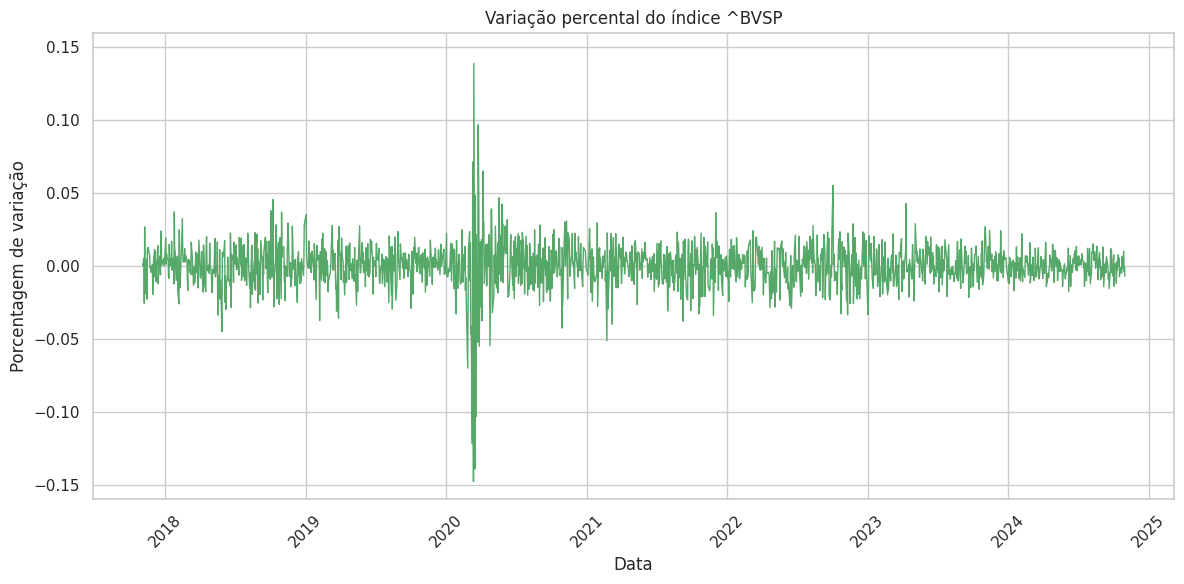

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df_bvsp_diff_index['Date'], df_bvsp_diff_index[bvsp_ticker], color='g', linestyle='-', linewidth=1)
plt.xlabel('Data')
plt.ylabel('Porcentagem de variação')
plt.title(f'Variação percental do índice {bvsp_ticker}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(-0.16, 0.16)
plt.show()

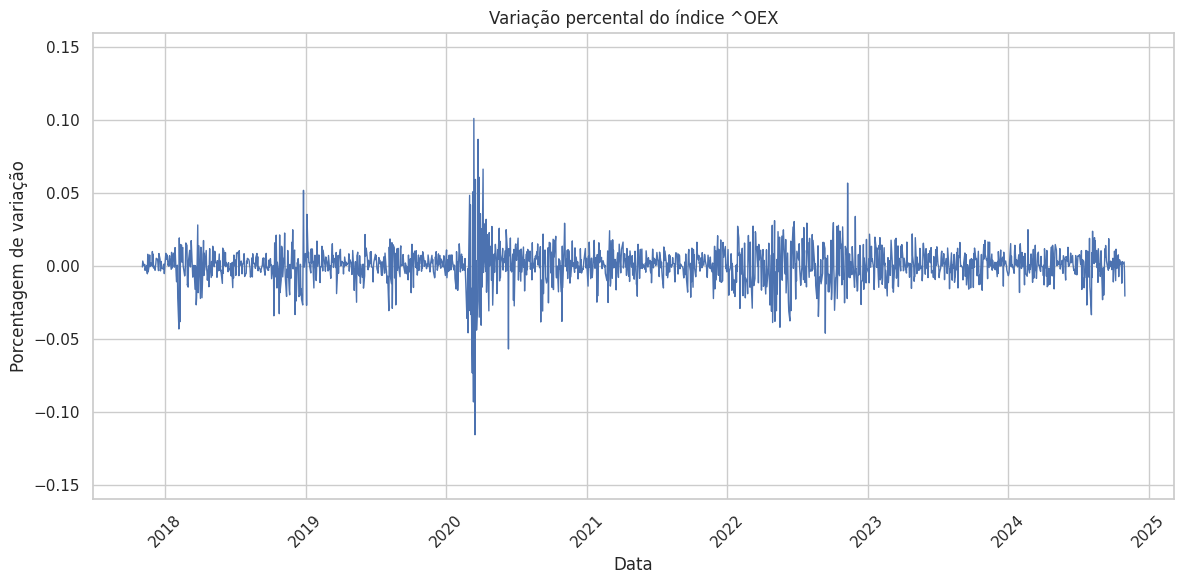

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df_sp100_diff_index['Date'], df_sp100_diff_index[sp100_ticker], color='b', linestyle='-', linewidth=1)
plt.xlabel('Data')
plt.ylabel('Porcentagem de variação')
plt.title(f'Variação percental do índice {sp100_ticker}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(-0.16, 0.16)
plt.show()

# Valor dos índices de 2018 até 2025

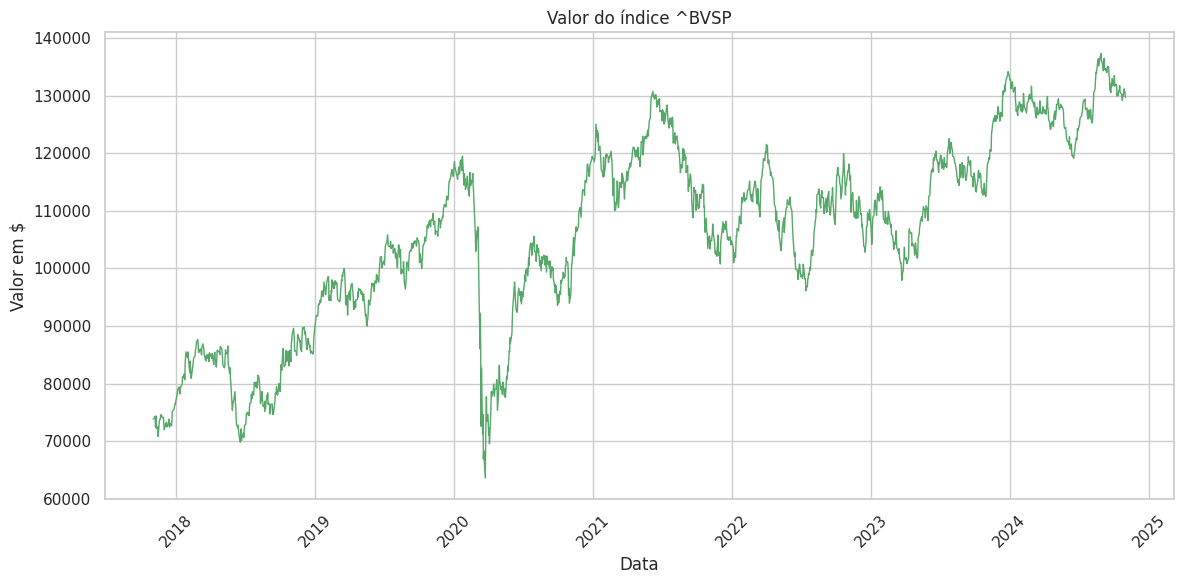

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df_bvsp_index['Date'], df_bvsp_index[bvsp_ticker], color='g', linestyle='-', linewidth=1)
plt.xlabel('Data')
plt.ylabel('Valor em $')
plt.title(f'Valor do índice {bvsp_ticker}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

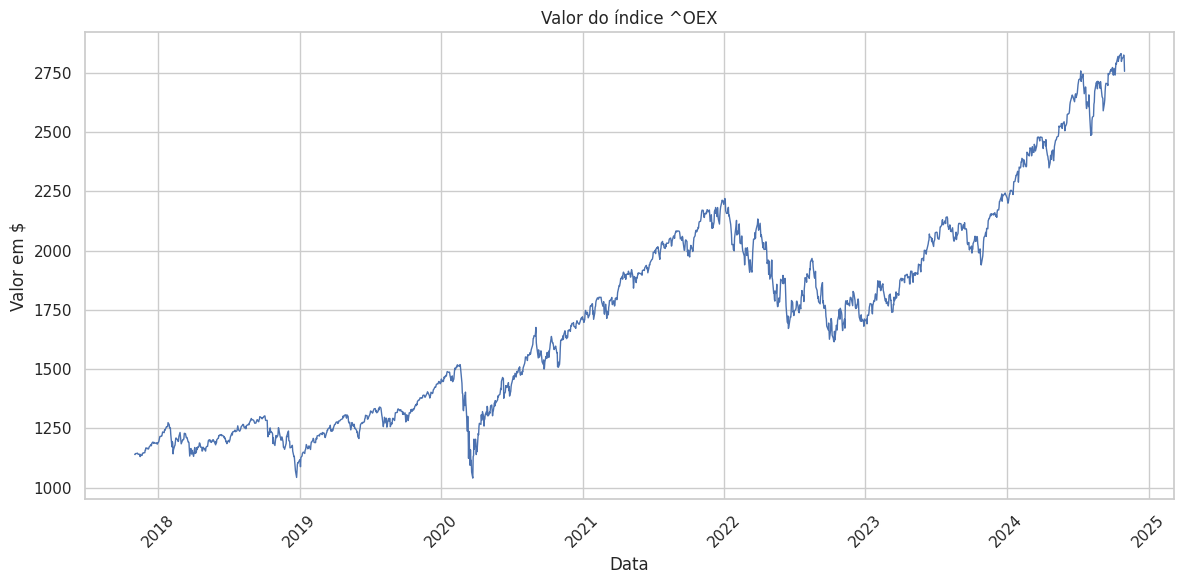

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df_sp100_index['Date'], df_sp100_index[sp100_ticker], color='b', linestyle='-', linewidth=1)
plt.xlabel('Data')
plt.ylabel('Valor em $')
plt.title(f'Valor do índice {sp100_ticker}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()